矢量数据几何处理  



In [9]:
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon, MultiPolygon, MultiPoint

def plot_geoms(geoms, colors=None, ax=None):
    '''几何可视化函数'''
    if not ax:
        fig, ax = plt.subplots()
    for i, geom in enumerate(geoms):
        if isinstance(geom, MultiPolygon):
            for poly in geom.geoms:
                if not poly.is_empty:
                    x, y = poly.exterior.xy
                    ax.fill(x, y, alpha=0.4, fc=colors[i] if colors else 'blue')
        if isinstance(geom, Polygon):
            x, y = geom.exterior.xy
            ax.fill(x, y, alpha=0.4, fc=colors[i] if colors else 'blue')
        elif isinstance(geom, LineString):
            x, y = geom.xy
            ax.plot(x, y, color=colors[i] if colors else 'red')
        elif isinstance(geom, Point):
            ax.scatter(geom.x, geom.y, color=colors[i] if colors else 'green')
    ax.set_aspect('equal')


#### 1. 几何创建、几何属性计算、几何空间判断

In [10]:
### 创建几何
from shapely.geometry import Point, LineString, Polygon
point = Point(2, 3)  ## 创建点几何
line = LineString([(1, 1), (2, 2), (3, 1)])  ## 创建线几何
poly1 = Polygon([(1, 3), (2, 1), (4, 1)]) ## 创建面几何
type(poly1)


shapely.geometry.polygon.Polygon

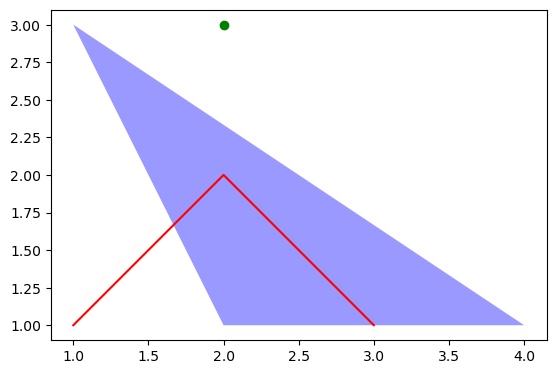

In [ ]:
plot_geoms([point, line, poly1])


课堂练习：云南大学呈贡校区几何要素创建   
云南大学呈贡校区边界角点：
(102.836,24.832),(102.846,24.836),(102.855,24.834),(102.857,24.835),(102.865,24.828),(102.855,24.827),(102.845,24.821)   
云南大学明远楼坐标：(102.847,24.832)

In [12]:
ynu_geo = Polygon([(102.836,24.832),(102.846,24.836),
                   (102.855,24.834),(102.857,24.835),
                   (102.865,24.828),(102.855,24.827),
                   (102.845,24.821)]) ## 创建面几何
mingyuan_geo = Point(102.847,24.832)


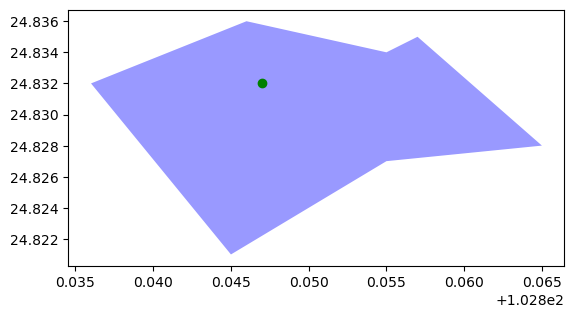

In [13]:
plot_geoms([ynu_geo, mingyuan_geo])


In [14]:
point.xy   # list(point.coords)
# line.xy   # list(line.coords)
# poly1.exterior.xy # list(poly1.exterior.coords)


(array('d', [2.0]), array('d', [3.0]))

In [15]:
## 几何属性计算
print(point.area)     # 面积（点面积为0）
print(line.length)    # 长度（线总长）
print(poly1.bounds)   # 边界框 (minx, miny, maxx, maxy)


0.0
2.8284271247461903
(1.0, 1.0, 4.0, 3.0)


In [ ]:
### 空间关系: 包含，距离，接触
# 点是否在面内
check1 = poly1.contains(point)  ## 是否包含
print(check1)
# 线与面是否接触
check2 = poly1.crosses(line)  ## 是否相交
print(check2)
# # 计算两个几何的距离
distance = point.distance(line)
print(distance)


False
True
1.0


#### 2. 矢量几何空间处理: 拓扑计算、坐标系转换、缓冲区分析


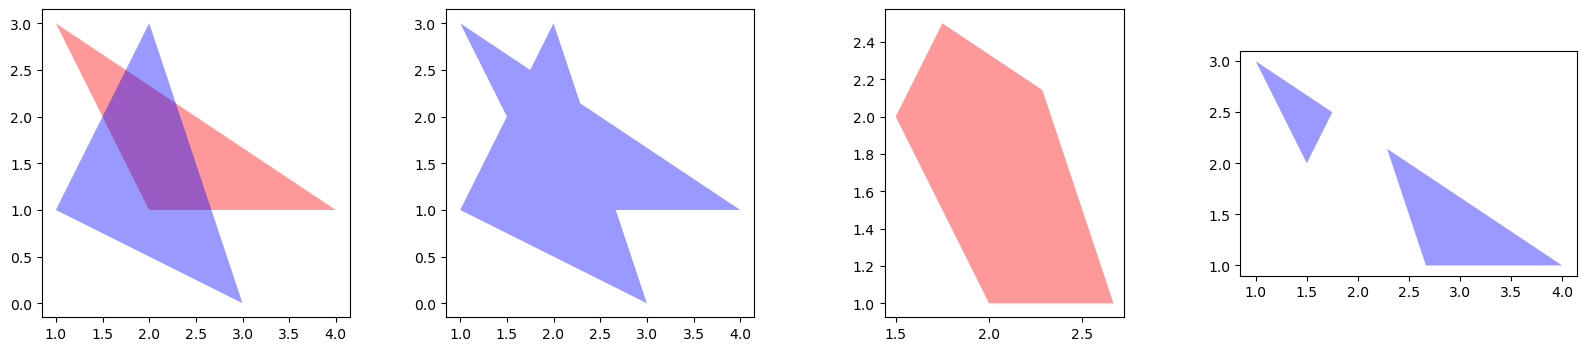

In [ ]:
## 拓扑计算
poly1 = Polygon([(1, 3), (2, 1), (4, 1)]) ## 创建面几何
poly2 = Polygon([(1, 1), (2, 3), (3, 0)])
# 联合（Union）
union = poly1.union(poly2)
# 交集（Intersection）
intersection = poly1.intersection(poly2)
## 差集（Difference）
diff = poly1.difference(poly2)
fig, ax = plt.subplots(1,4, figsize=(20,4))
plot_geoms(geoms=[poly1,poly2],colors= ['red', 'blue'], ax=ax[0])
plot_geoms(geoms=[union],ax=ax[1])
plot_geoms(geoms=[intersection],colors= ['red', 'blue'],ax=ax[2])
plot_geoms(geoms=[diff],ax=ax[3])



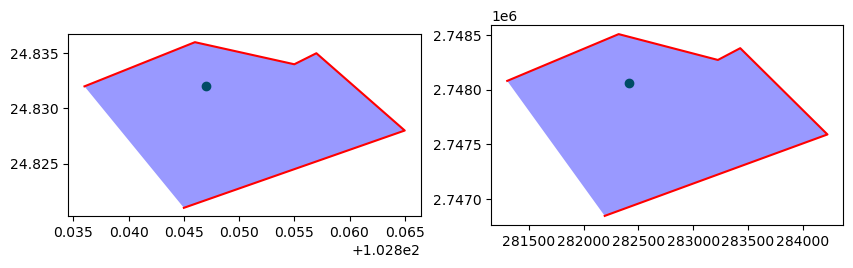

In [37]:
## 几何坐标系转换
from pyproj import Transformer  ## 定义转换器
from shapely.ops import transform   ## 定义转换函数

### 待转换几何要素
point_wgs84 = Point(102.847,24.832)  ## 创建点：明远楼坐标
ynu_line_wgs84 = LineString([(102.836,24.832),(102.846,24.836),
                   (102.855,24.834),(102.857,24.835),
                   (102.865,24.828),(102.845,24.821)])
ynu_polygon_wgs84 = Polygon([(102.836,24.832),(102.846,24.836),
                   (102.855,24.834),(102.857,24.835),
                   (102.865,24.828),(102.845,24.821)])

# 定义转换器
crs_src = "EPSG:4326"   # WGS84 (经度, 纬度)
crs_dst = "EPSG:32648"   # utm48 (米)
transformer = Transformer.from_crs(crs_src, crs_dst, always_xy=True)
## 点坐标转换
x_utm48, y_utm48 = transformer.transform(point_wgs84.x, point_wgs84.y)  ## 坐标转换
point_utm48 = Point(x_utm48,y_utm48)
# plot_geoms([point_utm48]) 
# 线/面坐标转换, 利用shapely.ops.transform
ynu_line_utm48 = transform(transformer.transform, ynu_line_wgs84)
ynu_polygon_utm48 = transform(transformer.transform, ynu_polygon_wgs84)
fig, ax = plt.subplots(1,2, figsize=(10,4))
plot_geoms([point_wgs84, ynu_line_wgs84, ynu_polygon_wgs84], ax=ax[0])
plot_geoms([point_utm48, ynu_line_utm48, ynu_polygon_utm48], ax=ax[1])




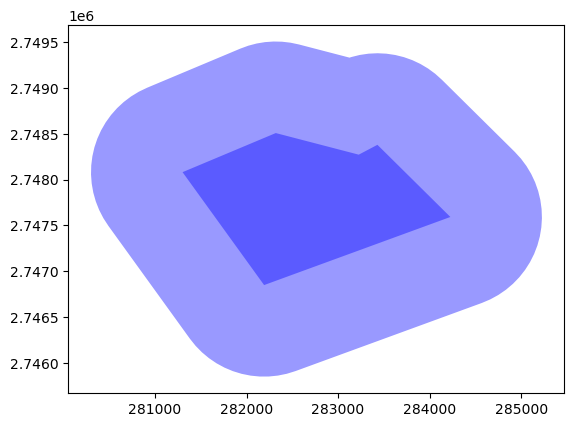

In [38]:
## 缓冲区分析
point_buffer = point_utm48.buffer(1000)   ## 1000米缓冲区
line_buffer = ynu_line_utm48.buffer(1000)   
polygon_buffer = ynu_polygon_utm48.buffer(1000) 

# 可视化
# plot_geoms(geoms=[point_utm48, point_buffer])
# plot_geoms(geoms=[ynu_line_utm48, line_buffer])
plot_geoms(geoms=[ynu_polygon_utm48, polygon_buffer])
